<img src="https://www.inf.utfsm.cl/images/slides/Departamento-de-Informtica_HORIZONTAL.png" title="Title text" width="80%" />

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398/578 Introducción al aprendizaje automático</h1>

<h4 align='center'><b>Tarea 1: Conceptos básicos y preparación para desafíos.</b></h4>


<h6 align='center'><b>Profesor:</b> Carlos Valle</h6>
<h6 align='center'><b>Ayudante:</b> Jean Aravena</h6>



<hr style="height:2px;border:none"/>

# **Tarea 1 📃**

## **Temas**  

* Manipulación básica de datos.
* EDA.
* Modelos clásicos.
* Feature Engineer.
* Feature Selection.
* Dimensionality Reduction.


## **Formalidades** 

* Equipos de trabajo de 2 personas.
* El entregable debe ser este mismo Jupyter Notebook incluyendo todos los resultados, los gráficos realizados y las respuestas a las preguntas. 
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el Jupyter Notebook que entregarán.
* Formato de entrega: Subir a aula el Jupyter Notebook con el nombre NombreGrupo_Tarea_1_ML_2022_1
* Fecha de entrega y presentaciones: 6 de Mayo. Hora límite de entrega: 12:00.
 

<hr style="height:2px;border:none"/>

La tarea se divide en 2 partes:

1.   Un pequeño review guiado.
2.   Practica del review.


La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo, solo son guías y pueden ser creativos al momento de resolver la tarea. También en algunas ocasiones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.

Recuerden intercalar su código con comentarios y utilizar celdas Markdown en caso de que sea necesario para realizar análisis, escribir fórmulas o realizar explicaciones que les parezca relevante para justificar sus procedimientos. 

Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará mucho la elección en sí, en cambio la argumentación detrás de la elección será lo más ponderado.

*Se recomienda el uso de Google Colab para realizar la tarea.*

# Librerias 📚
 

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVR
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

sns.set_theme()
warnings.filterwarnings('ignore')

# Utils ⚙️  

In [3]:
print("Mounting your Google Drive ...")

from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

# Path to your folder
path = '/content/drive/MyDrive/Machine Learning/Data'

Mounting your Google Drive ...


ModuleNotFoundError: No module named 'google'

In [2]:
# Set all seed.
def set_all_seed(seed=0):
  """Set the same seed for all the libraries that we use."""
  np.random.seed(seed)

# Elegir cualquier semilla y siempre que se pueda utilizarla
# random_state = SEED
SEED = 2022

set_all_seed(seed=SEED)

**¿Por qué le asignamos un valor a la semilla antes de empezar a trabajar en la tarea?** [5 Pts]

`Respuesta`: Al asignar un valor a la semilla, podemos obtener los mismos numeros pseudoaleatorios para acada ejecución. Podriamos probar distintos modelos asegurando que la muestra pseudoaleatoria es la misma

# 1.1) Modelos clásicos 💣

<img src="https://drive.google.com/uc?id=1PoKzD6frdYWfXbEtPqXWt7s-GPMsluNI" width="50%"/>

Para la primera parte de la tarea trabajaremos con una version simplificada del dataset [Bitcoin Heist Ransomware Address](https://archive.ics.uci.edu/ml/datasets/BitcoinHeistRansomwareAddressDataset) el cual viene de un repositorio publico llamado [UCI](https://archive.ics.uci.edu/ml/index.php).
*Se recomienda ampliamente el uso de ese repositorio para comenzar a aprender sobre machine learning*.

La data corresponde a 92.588 instancias las cuales tienen relación con el grafo de transacciones de Bitcoin entre Enero de 2007 y Diciembre de 2018.

Para el dataset se tienen nueve características (features) las cuales están diseñadas para identificar ciertos patrones dentro del grafo de transacciones donde la idea es predecir si la dirección pertenece a un ransomware o no:

* `address`: Dirección
* `year`: Año
* `day`: Día del año
* `length`: Distancia que realiza la transacción desde una dirección
* `weight`: Peso relacionado con la cantidad de arcos que salen y entran a un nodo. Mientras se tengan más arcos de entrada y menos de salida, mayor va a ser este valor.
* `count`: Número de transacciones realizadas desde una direccion
* `looped`: Número de transacciones realizadas desde una direccion que tienen un loop dentro del grafo
* `neighbors`: Cantidad de vecinos de una dirección.
* `income`: Cantidad de bitcoin en la transacción expresada en satoshis (1 bitcoin = 100 millones de satoshis).

y un target (lo que queremos predecir):

* `label`: Nombre del ransomware.


## Carga de datos

Lo primero que vamos a hacer es cargar la data y explorar un poco su contenido

In [3]:
# Cargar la data que corresponde a un csv
PATH_TO_CSV = os.path.join("Data", "tarea_1_bitcoin.csv")
df_data = pd.read_csv(PATH_TO_CSV)

## Exploración de la data

In [4]:
# Mostrar el numero de ejemplos que tenemos
print(f"Number of examples: {len(df_data)}")

# Mostrar las dimensiones de la data
print(f"Shape of the data: {df_data.shape}")

Number of examples: 92588
Shape of the data: (92588, 10)


Como bien sabíamos existen 92.588 instancias y contamos con 10 columnas, las primeras nueve corresponden a features y la última corresponde al target

In [5]:
# Mostrar los primeros cinco elementos de la data
df_data.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,1Q4W2DaHg7WAYunf9tPknTSRWLZwHaQGJx,2013,363,120,8.243819e-01,1247,0,1,6.000000e+07,grouped_ransomware
1,1Ae6zv8ymHdzBXMbpDu5MWLriA5ijSUZQd,2011,256,48,2.384186e-07,1,0,2,2.591979e+09,white
2,13d3wEoqVFWgHwHyoZhd1gFbL3AoHa252T,2014,108,0,1.000000e+00,1,0,1,8.727817e+07,grouped_ransomware
3,1Dcndtg4Qunp3n2mndvkBs8VKxS3PAkPEF,2013,156,0,5.000000e-01,1,0,2,3.644640e+08,white
4,17eBib5PiFoGx8AhK4HjpZp9ANyuGRbusV,2011,21,0,5.000000e-01,1,0,2,5.000000e+08,white


In [6]:
# Mostrar los ultimos cinco elementos de la data
df_data.tail()

,address,year,day,length,weight,count,looped,neighbors,income,label
92583,1FyVwHjYPi9EAY2jDzHatFE1BwLYtWczv4,2017,240,2,2.500000e-01,1,0,2,42812712.0,white
92584,1MfpBhXFVPEsihzd7qPDt3HB74ST8HxSqr,2016,219,2,1.333333e+00,2,0,2,72820000.0,grouped_ransomware
92585,14NNhLDwLo89wbDHiWBQHgNRDvt2r8Y65u,2015,211,144,1.001217e-07,382,0,2,198685860.0,white
92586,16JKdw8VoBi9x4dYNGpzG1cNebPsTF1R2M,2014,185,4,5.000000e-01,1,0,2,88000000.0,white
92587,3QgGBpkEpsbStf2AZL6wmTTWKVtgdVmbUi,2016,108,144,3.645027e-03,4069,0,1,371180000.0,white


In [7]:
# Obtener el tipo de dato de cada columna
df_data.dtypes

address       object
year           int64
day            int64
length         int64
weight       float64
count          int64
looped         int64
neighbors      int64
income       float64
label         object
dtype: object

In [8]:
# Generar estadisticas tipicas por columna (Inluye solo valores numericos)
# Si quieres incluir los valores categoricos (strings) tienes que utilizar
# include="all" -> df_data.describe(include="all")
df_data.describe()

,year,day,length,weight,count,looped,neighbors,income
count,92588.000000,92588.000000,92588.000000,9.258800e+04,92588.000000,92588.000000,92588.000000,9.258800e+04
mean,2014.566024,179.727027,44.136713,5.561919e-01,697.490830,207.648756,2.150376,3.653018e+09
std,2.108102,102.112306,58.814743,2.476162e+00,1648.008167,896.710751,11.826918,1.616788e+11
min,2011.000000,1.000000,0.000000,4.244610e-84,1.000000,0.000000,1.000000,3.000000e+07
25%,2013.000000,91.000000,2.000000,2.852745e-02,1.000000,0.000000,1.000000,7.656892e+07
50%,2015.000000,175.000000,8.000000,2.505801e-01,1.000000,0.000000,2.000000,1.805104e+08
75%,2016.000000,269.000000,100.000000,1.000000e+00,49.000000,0.000000,2.000000,7.371084e+08
max,2018.000000,365.000000,144.000000,4.982885e+02,14496.000000,14496.000000,1593.000000,4.645481e+13


In [9]:
# Contar la cantidad de null en las columnas (si hubieran muchos habria que buscar alguna forma de lidear con ello). 
df_data.isna().sum()

address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64

In [10]:
# Mostrar la cantidad de valores unicos para el feature address
print(f"Number of unique values: {len(np.unique(df_data['address']))}")

Number of unique values: 82491


Como prácticamente todos los valores son distintos para la columna `address` y la variable tiene relación con un ID podemos descartar la columna. Si por algún motivo sabemos que las direcciones comparten cierto patrón sería bueno intentar aprovechar esa información, pero por temas de simplicidad solo la eliminaremos de la data

In [11]:
# Drop address
df_data.drop(columns=["address"], inplace=True) 

Ahora ya sabemos un poco más de la data:

*   Dada la eliminación de address tenemos solo una variable categórica que es label.
*   No existen columnas con una alta cantidad de nulls.



**Genere gráficos con su correspondiente título, leyenda, etc. utilizando seaborn, matplotlib o plotly para cada una de las siguientes columnas del dataframe: `length`, `weight`, `count`, `looped`, `neighbors`, `income`, `label`. Comente lo que observa de cada gráfico** [5 Pts] 

Pueden utilizar gráficos repetidos, pero no pueden ser todos iguales. La idea de esta parte es utilizar gráficos que muestren información relevante de la data. Para ello puede utilizar un histograma, violinplot, boxplot, etc.

Text(0, 0.5, 'Ransomware')

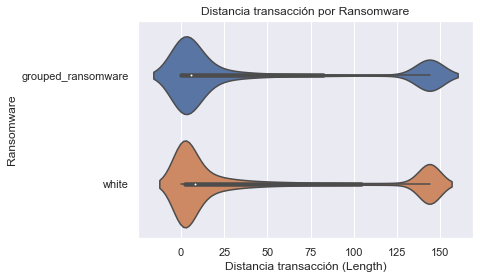

In [12]:
# Grafico para la columna length
fig, ax = plt.subplots()
ax.set_title("Distancia transacción por Ransomware")
sns.violinplot(data=df_data, x="length", y="label")
ax.set_xlabel("Distancia transacción (Length)")
ax.set_ylabel("Ransomware")


`Comentario`: Podemos notar que existe un comportamiento similar para los dos tipos de Ransomware. Ademas notamos que hay dos grupos de distancias frecuentes. El primer grupo con mayor frecuencia tiene distancias de transacción entre 0 y 25. El otro grupo con un poco menos de frecuencia se encuentra entre 125-150. 

<AxesSubplot:xlabel='weight', ylabel='label'>

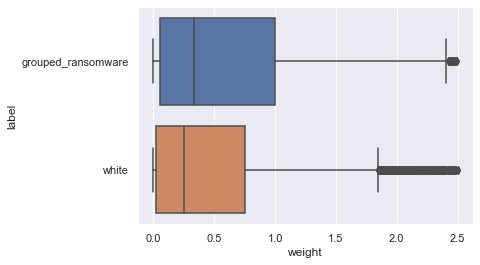

In [13]:
# Grafico para la columna weight
sns.boxplot(data=df_data[df_data.weight < 2.5], x="weight", y="label") # PROBAR HISTOGRAMA  o SACAR DATOS ATIPICOS

In [14]:
df_data[["weight","label"]][df_data.weight > 2.5]

,weight,label
16,3.500000,grouped_ransomware
67,4.306676,white
106,3.000000,white
140,2.597440,white
156,7.500467,grouped_ransomware
...,...,...
92288,5.109375,white
92350,4.812500,white
92369,2.987894,white
92376,5.320313,grouped_ransomware


`Comentario`: En general los valores de weight son menores a 1. Para la clase grouped ransomware tenemos un $Q_3$ = 1, mientras que para la clase white tenemos un $Q_3=xxxx$. Es decir, para ambas clases aproximadamente el 75% de los valores que toma weight son menores a 1.

<AxesSubplot:xlabel='count', ylabel='Count'>

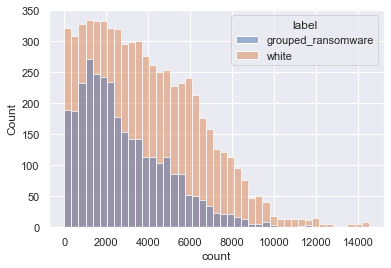

In [15]:
# Grafico para la columna count
data=df_data.groupby(["count","label"]).size().reset_index().rename(columns = {0:"qty"})
sns.histplot(data = data, x = "count",hue='label')

`Comentario`: 

<AxesSubplot:xlabel='looped', ylabel='Count'>

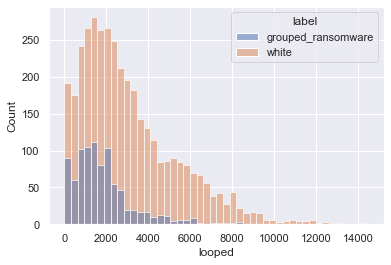

In [16]:
# Grafico para la columna looped
data=df_data.groupby(["looped","label"]).size().reset_index().rename(columns = {0:"qty"})
sns.histplot(data = data, x = "looped",hue='label')

`Comentario`: 

<AxesSubplot:xlabel='neighbors', ylabel='Count'>

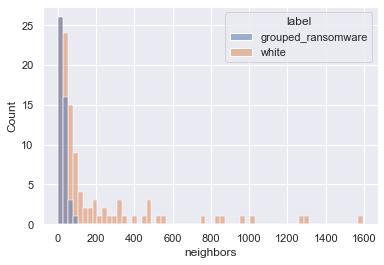

In [19]:
# Grafico para la columna neighbors
### START CODE HERE ###
data=df_data.groupby(["neighbors","label"]).size().reset_index().rename(columns = {0:"qty"})
sns.histplot(data = data, x = "neighbors",hue='label')

`Comentario`: 

<AxesSubplot:xlabel='income', ylabel='Count'>

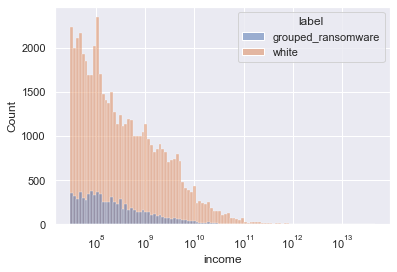

In [30]:
# Grafico para la columna income
data=df_data.groupby(["income","label"]).size().reset_index().rename(columns = {0:"qty"})
sns.histplot(data = data,log_scale=True, x = "income",hue='label')

`Comentario`: 

<AxesSubplot:xlabel='label', ylabel='count'>

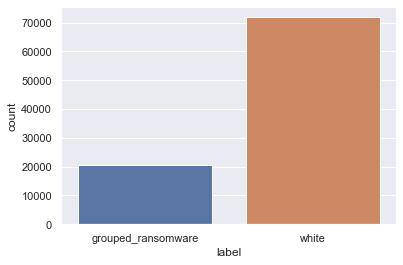

In [23]:
# Grafico para la columna label
sns.countplot('label',data=df_data)

`Comentario`: 

**Que nueva información le han aportado los gráficos respecto a la data y cuál es la utilidad de visualizar la data antes de entrenar un algoritmo de Machine Learning** [2 Pts] 

`Respuesta`: 

## Preprocesamiento

El proceso típico de entrenamiento de un modelo consta de dividir la data en 3 conjuntos, uno para entrenamiento, otro para validacion y otro para testing

**Defina cual es la utilidad de cada uno de estos conjuntos e implemente el código para separar la data considerando un split de 80/10/10 respectivamente** [3 Pts]

*80% de la data para entrenamiento, 10% para validación y el 10% para testing*

*Para ello se puede apoyar en la función [train_test_split](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) de scikit-learn.*

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size="size_for_test", random_state=SEED)
```
```
# Using a pandas dataframe
df_train, df_test = train_test_split(df_data, test_size="size_for_test", random_state=SEED)
```

In [31]:
# Dividir la data considerando el split indicado anteriormente
df_train, df_test = train_test_split(df_data, test_size=0.2)

df_val, df_test = train_test_split(df_test, test_size=0.5) 



*   `Training`:
*   `Validation`:
*   `Testing`: 



## Feature Engineer 

Feature Engineer se considera un arte porque involucra mucho la creatividad con el conocimiento del dominio del problema. Consiste en el proceso de crear nuevas características o features a partir de otras existentes. En general la idea principal es la de utilizar el conocimiento del contexto del problema o bien del dominio de los datos para aprovechar esa información y crear features que puedan ayudar en el desempeño de un algoritmo, si bien existen técnicas más o menos estándar como lo puede ser normalizar o standarizar valores numéricos tambien existen otras transformaciones que no son tan simples y varían mucho dependiendo del problema. 


<img src="https://drive.google.com/uc?id=1Q9i-Jr2HHgMS5vg5lv-Q0ZhAxLuW47Xm" width="70%"/>


[Referencia](https://elitedatascience.com/feature-engineering)

### Standard techniques

Como se ha mencionado anteriormente existen técnicas bastante conocidas en la actualidad para abordar el apartado de Feature Engineer donde la mayoria de estas se pueden dividir en dos grandes grupos dependiendo del tipo de datos tengamos:

1.   Variables numéricas
2.   Variables categóricas



#### Numerical values

*   Normalizing: `MinMaxScaler `
*   Standarizing: `StandardScaler`

**Muestre cual es la transformación que aplica MinMaxScaler y StandardScaler a una muestra x** [1 Pts]


*   `MinMaxScaler` : $x=\frac{a}{b} \hspace{1cm} x \in [a, b]$
*   `StandardScaler` : $x=\frac{a}{b} \hspace{1cm} x \in [a, b]$

#### Categorical values

*   One-Hot Encoding.
*   Ordinal Encoding.
*   Label Encoding.



**Defina o explique la transformación que aplica cada uno de los siguientes encoding e indique la diferencia entre ellos considerando sklearn** [3 Pts]



*   `One-Hot Encoding`: 
*   `Ordinal Encoding`: 
*   `Label Encoding`: 

#### Otras/Especiales

*   Bucketizing.
*   Fechas.


**Investigue y defina que es el Bucketing en Machine Learning** [2 Pts]

`Bucketing`: 

**Observe el siguiente código y comente cuál podría ser su utilidad para una variable relacionada con fechas, como lo puede ser un día** [2 Pts]


*Hint 1: ¿Por qué no mejor utilizar One-Hot Encoding*

*Hint 2: Mirar las ppt de la primera clase*


In [32]:
def preprocess_day(df, column):
  """Funcion que toma la columna dia y crea dos features utilizando esa variable"""
  DAYS_IN_YEAR = 365
  df['sin_day'] = np.sin(2 * np.pi * df[column] / DAYS_IN_YEAR)
  df['cos_day'] = np.cos(2 * np.pi * df[column] / DAYS_IN_YEAR)
  df.drop(columns=[column], inplace=True)
  return df

In [33]:
# Crear un dataframe de muestra y aplicar la funcion
df = pd.DataFrame(data=np.arange(1, 366), columns={"day"})
df = preprocess_day(df, column="day")
df.head()

,sin_day,cos_day
0,0.017213,0.999852
1,0.034422,0.999407
2,0.051620,0.998667
3,0.068802,0.997630
4,0.085965,0.996298


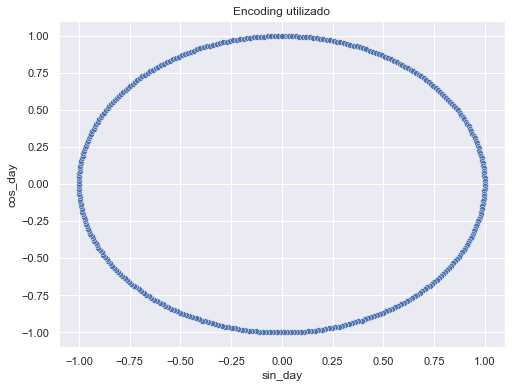

In [34]:
# Mostrar la transformacion aplicada
fig = plt.figure(figsize=(8, 6))

sns.scatterplot(data=df, x="sin_day", y="cos_day").set_title("Encoding utilizado")

plt.show()

`Respuesta`: 

**Crear una función que implemente las siguientes técnicas de preprocesamiento para cada feature especificado:** [3 Pts]

*   `MinMaxScaler` con rango (-1, 1): `weight`, `looped`
*   `StandardScaler`: `income`, `count`, `length`
*   `Bucketizing`: `neighbors`
    
    Considerando lo siguiente:

    1.   Valor menor o igual a 10 asignar: `"bajo"`
    2.   Valor mayor a 10 y menor o igual a 500 asignar: `"medio"`
    3.   Valor mayor a 500 asignar: `"alto"`

*   `Ordinal Encoding`: `year`
*   `Label Encoding`: `label`
*   `Fecha`: `day`





In [ ]:
# Funcion que aplica el preprocesamiendo indicado
### START CODE HERE ###

In [ ]:
# Utilizar la funcion
### START CODE HERE ###

In [ ]:
# Mostrar la data despues del preprocesamiento (Training)

In [ ]:
# Mostrar la data despues del prorcesamiento (Validation)

In [ ]:
# Mostrar la data despues del procesamiento (Testing)

## Entrenamiento

Para la parte de entrenamiento vamos a utilizar tres modelos:

*   SVM
*   Naive Bayes
*   Logistic Regression

Para la elección del mejor modelo se considerará la evaluación de 4 métricas distintas para clasificación (acc, prec, rec y f1) y se utilizará `K-Fold Cross Validation`


**Implemente las siguientes funciones y entrene cada modelo utilizando K-Fold cross validation con K=10 y genere un gráfico de tipo boxplot con los resultados obtenidos por modelo. Finalmente comente cual es el mejor modelo en base a tiempo de entrenamiento y score obtenido** [5 Pts]

In [ ]:
# Funcion que divide la data en X_train, y_train, ... X_test, y_test
### START CODE HERE ###

In [ ]:
# Utilizar la funcion
### START CODE HERE ###

In [ ]:
# Funcion que computa las metrics acc, macro_prec, macro_rec y macro_f1
# dado un modelo y el conjunto de testing
### START CODE HERE ###

**Defina como se calcula cada una de las métricas. ¿Para el dataset que tenemos sería bueno utilizar accuracy como métrica? ¿Cuál recomendarías utilizar?** [2 Pts] 



*   `Accuracy`: 
*   `Macro Precision`:
*   `Macro Recall`: 
*   `Macro F1-Score`:



`Comentario`: 

In [ ]:
# Funcion que entrena los modelos utilizando K-Fold
### START CODE HERE ###

In [ ]:
# Llamar a la funcion
### START CODE HERE ###

In [ ]:
# Mostrar el boxplot con los resultados por modelo
### START CODE HERE ###

`Respuesta`: 

Como bien sabemos cada modelo tiene sus respectivos hiperparametros los cuales influyen en el resultado, es por ello por lo que también es importante optimizarlos, para ello se hará uso de una grilla de tipo random utilizando el conjunto de validacion

*Para ello se puede apoyar en la función [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) de scikit-learn.*

```
# specify parameters and distributions to sample from
# depend of the model 
param_dist = {
    "average": [True, False],
    "l1_ratio": stats.uniform(0, 1),
    "alpha": loguniform(1e-2, 1e0),
}
# run randomized search
n_iter_search = 15
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=n_iter_search
)
```
Para la variable `param_dist` lea la documentación del modelo que selecciono y cree una grilla a su gusto considerando los hiperparametros que le parecen más importantes


**Optimice los hiperparámetros para el mejor modelo utilizando el conjunto de validación** [3 Pts]

In [ ]:
# Funcion que obtiene los mejores hiperparametros para el mejor modelo
# seleccionado en la parte de K-Fold
### START CODE HERE ###

In [ ]:
# Llamar a la funcion
### START CODE HERE ###

In [ ]:
# Mostrar los hiperparametros
### START CODE HERE ###

**¿Cuál es el riesgo de setear los hiperparámetros utilizando el conjunto de testing?** [2 Pts]

`Respuesta`: 

## Predicción

**Implemente una función que evalúe su mejor modelo utilizando el conjunto de testing. Haga uso de los mejores hiperparametros y la función que calcula las 4 métricas** [2 Pts]

In [ ]:
# Funcion que evalua el mejor modelo con los hiperparametros encontrados anteriormente
### START CODE HERE ###

In [ ]:
# Llamar a la funcion
### START CODE HERE ###

In [ ]:
# Mostrar los resultados obtenidos en terminos de acc, macro_pre, macro_rec y macro_f1
### START CODE HERE ###

**Muestre la matriz de confusión para el conjunto de testing. ¿Como se calcula y cuál es su utilidad?** [2 Pts]

*Para ello se puede apoyar en la función [ConfusionMatrixDisplay
](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) de scikit-learn.*

```
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
...
plt.show()
```

In [ ]:
# Funcion que muestra la matriz de confusion para el conjunto de testing
### START CODE HERE ###

In [ ]:
# Llamar a la funcion

`Respuesta`: 

# 1.2) Feature Selection 📊


El tiempo de entrenamiento y el rendimiento de un algoritmo de aprendizaje automático dependen en gran medida de la calidad y cantidad de features que se tengan. Lo ideal al entrenar un algoritmo es conservar en el conjunto de datos solo las features que potencian a nuestro modelo dado que las características innecesarias y redundantes no sólo vuelven más lento el proceso de entrenamiento, sino que también afectan al rendimiento de este porque como bien sabemos tener demasiadas características podría invocar un problema bastante conocido: `The curse of dimensionality`

`Feature Selection` como su nombre lo indica tiene relacion con el proceso de seleccionar solo un subconjunto de features para entrenar un modelo. Algunas de las ventajas de utilizar esta selección son:

*   Disminuye el tiempo de entrenamiento de un modelo
*   Los modelos con menos features tienen mayor `explainability`, lo cual es un tema muy importante en la actualidad
*   Contar con menos features conduce a una mayor generalización lo que puede que reduzca el riesgo al sobreajuste



<img src="https://drive.google.com/uc?id=1IISn7jVFHNrN5nTBMg9alD8WX2tXLOYn" width="60%"/>

[Referencia](https://towardsdatascience.com/ensemble-feature-selection-in-machine-learning-by-optimalflow-49f6ee0d52eb)

## Filter Methods

Este tipo de selección de features utiliza métodos estadísticos para hacer un ranking en base al score obtenido y así eliminar las características que sean menor o mayor a un cierto treshold. Este método no suele ser muy preciso, pero es rápido de ejecutar dado que no requiere de entrenar un modelo para la selección de features.

**Implemente la selección de features utilizando Mutual Information y ANOVA f-test, ademas muestre (puede ser un print) que features selecciono cada método. Finalmente entrene nuevamente el algoritmo seleccionado con los mejores hiperparametros y grafique los resultados obtenidos para cada método** [2 Pts]

*Para ello se puede apoyar en la función [SelectKBest
](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) de scikit-learn.*

```
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_digits(return_X_y=True)
X.shape -> (1797, 64)
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
X_new.shape -> (1797, 20)
```

In [ ]:
# Funcion que selecciona features basandose en MI y ANOVA f-test 
### START CODE HERE ###

In [ ]:
# Llamar a la funcion
### START CODE HERE ###

In [ ]:
# Mostrar un grafico de los resultados al aplicar estos metodos para el conjunto de testing
### START CODE HERE ###

## Wrapper Methods

Los métodos de tipo Wrapper utilizan un modelo para medir la eficacia de un subconjunto particular de features. Están basados en una búsqueda de tipo greedy ya que evalúan todas las combinaciones posibles de las características y seleccionan la combinación que produce el mejor resultado para cierto algoritmo.

**Haga lo mismo que en el apartado de Filter Methods pero ahora implemente la selección de features utilizando ambas técnicas recursive feature selection y sequential feature selection** [2 Pts]

*Para ello se puede apoyar en la función [RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) de scikit-learn.*

```
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.ranking_ -> array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])
```
*y en la función [SequentialFeatureSelector](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html) de scikit-learn.*

```
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
sfs.fit(X, y)
sfs.get_support() -> array([ True, False,  True,  True])
```

In [ ]:
# Funcion que selecciona features basandose en RFE y SequentialFeatureSelector
### START CODE HERE ###

In [ ]:
# Llamar a la funcion
### START CODE HERE ###

In [ ]:
# Mostrar el grafico
### START CODE HERE ###

## Embedded Methods

Estos métodos aprovechan las propiedades intrínsecas que tienen algunos modelos ya que algunos algoritmos poseen la capacidad de seleccionan los mejores features cuando se entrenan. Con ello bastaría con solo acceder a estas propiedades para obtener un ranking para cada feature.

**Haga lo mismo que en el apartado de Filter Methods pero ahora implemente la selección de features utilizando Lasso y Ridge** [2 Pts]

Se recomienda utilizar `LinearSVC` con `penalty='l1'` para la parte de Lasso y con `penalty='2'` para la parte de Ridge

*Para ello se puede apoyar en la función [SelectFromModel
](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html) de scikit-learn.*

```
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
X = [[ 0.87, -1.34,  0.31 ],
...      [-2.79, -0.02, -0.85 ],
...      [-1.34, -0.48, -2.55 ],
...      [ 1.92,  1.48,  0.65 ]]
y = [0, 1, 0, 1]
selector = SelectFromModel(estimator=LogisticRegression()).fit(X, y)
selector.estimator_.coef_
array([[-0.3252302 ,  0.83462377,  0.49750423]])
selector.threshold_ -> 0.55245...
selector.get_support() -> array([False,  True, False])
```

In [ ]:
# Funcion que selecciona features basandose en Lasso y Ridge
### START CODE HERE ###

In [ ]:
# Llamar a la funcion
### START CODE HERE ###

In [ ]:
# Mostrar el grafico
### START CODE HERE ###

## Dimensionality reduction

En general `Feature Selection` y `Dimensionality Reduction` se posicionan al mismo nivel porque ambos métodos se utilizan para reducir el número de features, pero existe una diferencia importante. `Feature Selection` consiste en simplemente seleccionar un subconjunto de features sin modificarlas, mientras que `Dimensionality Reduction` consiste en transformar los features a una dimensionalidad menor

<img src="https://drive.google.com/uc?id=123LTzclTBTNSZgHfaMBswL7tkS3l8L7X" width="60%"/>

[Referencia](https://towardsdatascience.com/dimensionality-reduction-cheatsheet-15060fee3aa)

### PCA

**Utilizando el mejor modelo genere un gráfico con la varianza acumulada vs la cantidad de componentes para PCA considerando como máximo `n_components=num_features`, ademas entrene el mejor modelo con los mejores hiperparametros y genere un gráfico de score vs número de componentes** [2 Pts]

In [ ]:
# Funcion que realiza un plot de la varianza acumulada vs numero de componentes para PCA
### START CODE HERE ###

In [ ]:
# Llamar a la funcion
### START CODE HERE ###

In [ ]:
# Funcion que evalua el modelo en base al numero de componentes para PCA
### START CODE HERE ###

In [ ]:
# LLamar a la funcion
### START CODE HERE ###

In [ ]:
# Mostrar el grafico
### START CODE HERE ###

### LDA


**Haga el mismo procedimiento realizado en la parte de entrenamiento con PCA pero ahora con LDA** [2 Pts]

Recuerde que `n_components cannot be larger than min(n_features, n_classes - 1)`

In [ ]:
# Funcion que evalua el modelo luego de pasar por LDA
### START CODE HERE ###

In [ ]:
# LLamar a la funcion
### START CODE HERE ###

In [ ]:
# Mostrar el grafico
### START CODE HERE ###

# 1.3) Regression 📈 

El dataset anterior era de clasificación, así que ahora intentaremos usar algunas técnicas de lo aprendido en la parte 1.1 y 1.2 pero para un problema de regresión. Para ello utilizaremos el clásico dataset diamonds que consiste en predecir el precio de un diamante en base a ciertas características

<img src="https://drive.google.com/uc?id=19JxMzb0ccbzBD94XcQ7wpKnEWV62sEcs" width="50%"/>

[Referencia](https://clickmica.fundaciondescubre.es/conoce/100-preguntas-100-respuestas/diamante-para-siempre/)

La data corresponde a 53.940 instancias las cuales tienen relación con el precio de un diamante.

Para el dataset se tienen nueve características (features) las cuales están diseñadas para identificar ciertos patrones dentro del grafo de transacciones:

* `carat`: Peso del diamante
* `cut`: Calidad del corte (Fair, Good, Very Good, Premium, Ideal)
* `color`: Color del diamante J (worst) to D (best)
* `clarity`: Claridad del diamante (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* `depth`: Porcentaje de profundidad = z / mean(x, y) = 2 * z / (x + y) 
* `table`: Ancho de la parte superior del diamante
* `x`: Largo
* `y`: Ancho
* `z`: Profundidad

y un target (lo que queremos predecir):

* `price`: Precio del diamante

## Carga de datos

In [ ]:
# Cargar la data que corresponde a un csv
PATH_TO_CSV = os.path.join(path, "tarea_1_diamonds.csv")
df_data = pd.read_csv(PATH_TO_CSV, index_col=0)

## Exploración y preprocesamiento

**Implemente el código para separar la data considerando un split de 80/10/10 respectivamente, ademas genere gráficos individuales para todas las columnas y genere gráficos de a pares como por ejemplo carat vs price. Comente los gráficos** [3 Pts]

In [ ]:
# Hacer el split de la data
### START CODE HERE ###

In [ ]:
# Generar graficos (agregue la cantidad de celdas que requiera)
### START CODE HERE ###

**Crear una función que implemente las siguientes técnicas de preprocesamiento para cada feature especificado:** [3 Pts]

*   `MinMaxScaler` con rango (-1, 1): `depth`, `table`
*   `StandardScaler`: `x`, `y`, `z`
*   `Bucketizing`: `carat`
    
    Considerando lo siguiente:

    1.   Valor menor o igual a 1 asignar: `"bajo"`
    2.   Valor mayor a 1 y menor o igual a 2 asignar: `"medio"`
    3.   Valor mayor a 2 asignar: `"alto"`

*   `Ordinal Encoding` (recordar mantener el orden): `cut`, `color`, `clarity`

In [ ]:
# Fucnion que implementa las tecnicas de preprocesamiento indicadas
### START CODE HERE ###

In [ ]:
# Llamar a la funcion
### START CODE HERE ###

## Entrenamiento

Para la parte de entrenamiento vamos a utilizar tres modelos:

*   Lasso
*   Ridge
*   Linear Regression

Para la elección del mejor modelo se considerará la evaluación de 2 métricas distintas para regresión (MSE y MAE) y se utilizara `K-Fold Cross Validation


**Implemente las siguientes funciones y entrene cada modelo utilizando K-Fold cross validation con K=10 y genere un gráfico de tipo boxplot con los resultados obtenidos por modelo. Finalmente comente cual es el mejor modelo en base a tiempo de entrenamiento y score obtenido** [3 Pts]

In [ ]:
# Divida la data en X_train, y_train, ... X_test, y_test
### START CODE HERE ###

In [ ]:
# Funcion que computa las metricas mse y mae dado el modelo y el conjunto de testing
### START CODE HERE ###

**Defina como se calcula cada una de las siguientes métricas** [1 Pts]



*   `MSE`: 
*   `MAE`: 

In [ ]:
# Funcion que entrena los modelos utilizando K-Fold
### START CODE HERE ###

In [ ]:
# Boxplot con los resultados de K-Fold para cada modelo
### START CODE HERE ###

**Optimice los hiperparámetros para el mejor modelo utilizando el conjunto de validación** [2 Pts]

In [ ]:
# Funcion que obtiene los mejores hiperparametros para el mejor modelo
# seleccionado en la parte de K-Fold
### START CODE HERE ###

In [ ]:
# Llamar a la funcion
### START CODE HERE ###

In [ ]:
# Mostrar los mejores hiperparametros
### START CODE HERE ###

## Predicción

**Implemente una función que evalúe su mejor modelo utilizando el conjunto de testing haciendo uso de los mejores hiperparámetros, evalúe utilizando la función que calcula las 2 métricas** [2 Pts]

In [ ]:
# Funcion que evalua el mejor modelo con los hiperparametros encontrados anteriormente
### START CODE HERE ###

In [ ]:
# LLamar a la funcion
### START CODE HERE ###

In [ ]:
# Mostrar los resultados obtenidos en terminos de mse y mae
### START CODE HERE ###

## Feature Selection


**Implemente la selección de features utilizando Mutual Information, RFE, Ridge/Lasso y PCA. Finalmente entrene nuevamente el algoritmo seleccionado para cada caso con sus respectivos hiperparametros y grafique los resultados obtenidos para cada método** [4 Pts]



*   `Mutual Information`: Seleccionar features considerando solo el percentil 50 
*   `RFE`: Seleccionar como máximo 5 features

*   `Ridge/Lasso`: Si selecciono como modelo base Ridge usar Lasso para feature selection y viceversa, si selecciono Linear Regression puede implementar libremente cualquiera de las dos

*   `PCA`: Utilizar 5 componentes





In [ ]:
# Funcion que aplica las tecnicas de preprocesamiento indicadas
### START CODE HERE ###

In [ ]:
# Llamar a la funcion
### START CODE HERE ###

In [ ]:
# Graficar los resultados obtenidos
### START CODE HERE ###

**Comente sobre los resultados obtenidos y respecto su opinión respecto al uso de Feature Selection?** [2 Pts]

`Comentario`: 

# 2) Warm up para las próximas tareas 🏆



Para la última parte intentaremos prepararlos para las próximas tareas en la cuales se les presentara un dataset y tendrán que competir para obtener el mejor score en el conjunto de testing, así que se recomienda jugar harto con el dataset y recuerden que entrenar un modelo es un proceso iterativo

<img src="https://drive.google.com/uc?id=1KlleL_2AfK87Llz1CvGIXSBszprRgCoY" width="60%"/>


[Referencia](https://www.elagoradiario.com/desarrollo-sostenible/cambio-climatico/el-viento-aumentado-7-ultima-decada/)

El dataset con el cual van a trabajar consta de predecir una variable binaria relacionada con predecir si un molino de viento va a tener una falla o no utilizando 170 features los cuales por temas de privacidad se encuentran anonimizados.

Features:

* `aa_000-eg_000`: Variables de origen desconocido

Target:

* `class`: Predicción de la falla


Se les proporcionará el conjunto de testing para que todos evalúen en el mismo conjunto y se les pedirá que ademas antes de subir su tarea rellenen en un formulario cual es el score que obtuvieron en esta última parte para el conjunto de testing considerando como métrica `Cost` la que se define más abajo

In [ ]:
PATH_TO_TRAIN_CSV = os.path.join(path, "tarea_1_train.csv")
PATH_TO_TEST_CSV = os.path.join(path, "tarea_1_test.csv")
df_train = pd.read_csv(PATH_TO_TRAIN_CSV)
df_test = pd.read_csv(PATH_TO_TEST_CSV)

In [ ]:
print(f"Number of examples for training: {len(df_train)}")
df_train.head()

Number of examples for training: 60000


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [ ]:
print(f"Number of examples for testing: {len(df_test)}")
df_test.head()

Number of examples for testing: 16000


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


**Entrene uno o si puede los 3 modelos revisados en la parte 1) y aplique lo aprendido en esta tarea para intentar obtener el mejor score en el conjunto de testing considerando una métrica especial que se define de la siguiente manera `Cost = 10*FP + 500*FN`** [30 Pts]

Donde:
*   `FP`: Número de falsos positivos
*   `FN`: Número de falsos negativos






Se usa esa metrica en específico porque al predecir una falla el costo de un falso negativo es mucho mayor que la de un falso positivo, un FP seria mandar a una persona a que revise y haga un mantenimiento al molino mientras que un FN seria no hacer nada y esperar que falle, lo cual es mucho más costoso para una empresa. Se recomienda buscar información sobre el tema de desbalance de clases, data imputation y asymmetric cost function


**BONUS del 10%** de la nota para los 5 equipos que obtengan el mejor score en el conjunto de testing. Esta permitido agregar la cantidad de celdas que requieran y también son libres de utilizar otras técnicas de feature engineer, feature selection o dimensionality reduction

Baseline: `Cost` = 78.820
- Código:
```
# Function to compute the score
def cost(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  cost = 10*fp + 500*fn
  return cost
# Clean na values
df_train = df_train.replace('na', np.NaN)
df_train.fillna(0, inplace=True)
df_test = df_test.replace('na', np.NaN)
df_test.fillna(0, inplace=True)
# Transform target
encoder = LabelEncoder()
df_train["class"] = encoder.fit_transform(df_train["class"])
df_test["class"] = encoder.transform(df_test["class"])
# Split data
y_train = df_train.pop("class")
X_train = df_train
y_test = df_test.pop("class")
X_test = df_test
# Train a model
model = LogisticRegression(C=25, random_state=SEED)
model.fit(X_train, y_train)
# Prediction
y_pred = model.predict(X_test)
# Compute score
costo = cost(y_test, y_pred)
print(f"Costo Total: {costo}")
```

In [ ]:
### START CODE HERE ###
